In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


array([[<Axes: title={'center': 'charges'}>]], dtype=object)

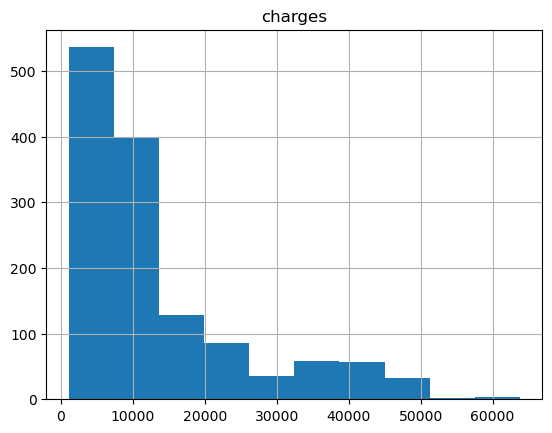

In [4]:
insurance.hist("charges")

In [5]:
import numpy as np

In [6]:
insurance["log_charges"] = np.log2(insurance["charges"])

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

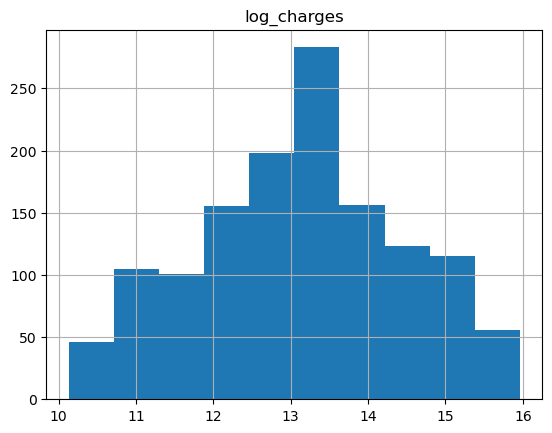

In [8]:
insurance.hist("log_charges")

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [10]:
numeric_data = insurance.select_dtypes(np.number)

In [11]:
numeric_data

,age,bmi,children,charges,log_charges
0,19,27.900,0,16884.92400,14.043448
1,18,33.770,1,1725.55230,10.752842
2,28,33.000,3,4449.46200,12.119415
3,33,22.705,0,21984.47061,14.424197
4,32,28.880,0,3866.85520,11.916945
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,13.371851
1334,18,31.920,0,2205.98080,11.107205
1335,18,36.850,0,1629.83350,10.670509
1336,21,25.800,0,2007.94500,10.971504


In [12]:
corr = numeric_data.corr() # -1 to 1

In [13]:
corr

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


In [14]:
corr["charges"]

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
log_charges    0.892964
Name: charges, dtype: float64

In [15]:
predictor = ["age", "bmi"]

In [16]:
cat_data = insurance.select_dtypes("O")

In [17]:
cat_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<Axes: title={'center': 'log_charges'}, xlabel='sex'>

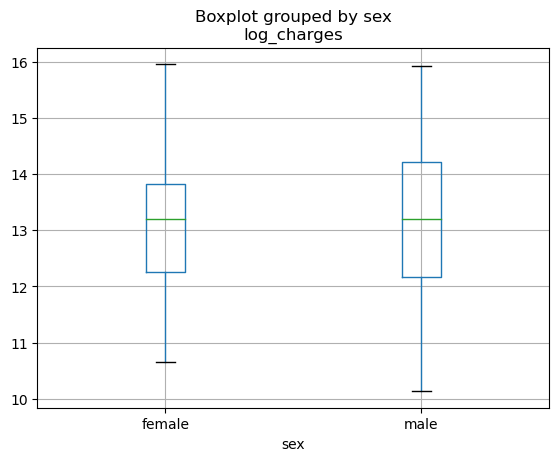

In [18]:
insurance.boxplot("log_charges", by = "sex")

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

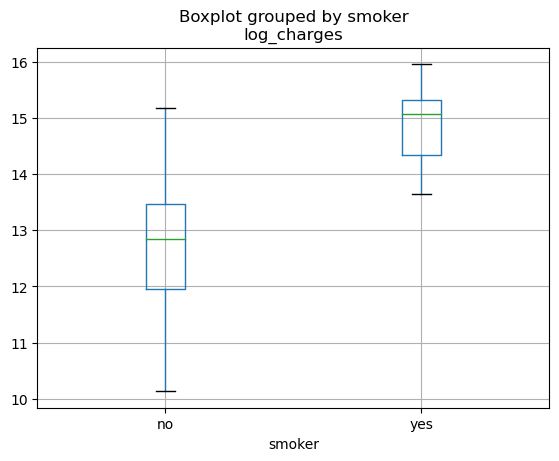

In [19]:
insurance.boxplot("log_charges", by = "smoker")

<Axes: title={'center': 'log_charges'}, xlabel='region'>

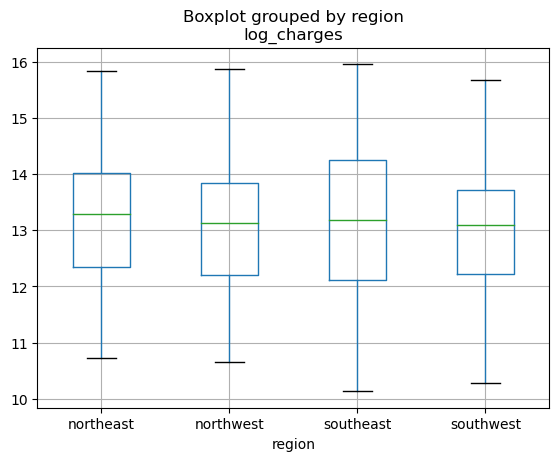

In [20]:
insurance.boxplot("log_charges", by = "region")

In [21]:
predictor

['age', 'bmi']

In [22]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [23]:
insurance["smoker"] == "yes"

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [24]:
insurance["is_smoker"] = insurance["smoker"] == "yes"

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False


In [26]:
predictor

['age', 'bmi']

In [27]:
predictor.append("is_smoker")

In [28]:
predictor

['age', 'bmi', 'is_smoker']

In [29]:
# y= mx + b

In [30]:
X = insurance[predictor]

In [31]:
X

,age,bmi,is_smoker
0,19,27.900,True
1,18,33.770,False
2,28,33.000,False
3,33,22.705,False
4,32,28.880,False
...,...,...,...
1333,50,30.970,False
1334,18,31.920,False
1335,18,36.850,False
1336,21,25.800,False


In [32]:
y = insurance["log_charges"]

In [33]:
y

0       14.043448
1       10.752842
2       12.119415
3       14.424197
4       11.916945
          ...    
1333    13.371851
1334    11.107205
1335    10.670509
1336    10.971504
1337    14.830781
Name: log_charges, Length: 1338, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
insurance_model = LinearRegression()

In [38]:
insurance_model.fit(X_train, y_train) # model training

LinearRegression()

In [39]:
# y = m1x1 + m2x2 + m3x3 + b

# y = m1*(age) + m2*(bmi) + m3*(is_smoker) + b

In [40]:
insurance_model.coef_

array([0.04892865, 0.01523672, 2.23063344])

In [41]:
insurance_model.intercept_

10.293741356673163

log_charges = 0.04892865*(age) + 0.01523672*(bmi) + 2.23063344*(is_smoker) + 10.293741356673163

In [42]:
X_test.head()

,age,bmi,is_smoker
559,19,35.53,False
1087,57,31.54,False
1020,51,37.00,False
460,49,36.63,False
802,21,22.30,False


In [46]:
y_predict_train = insurance_model.predict(X_train)

In [45]:
y_predict_test = insurance_model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
mse_train = mean_squared_error(y_train,y_predict_train) # mean((y - y^)**2)

In [49]:
mse_train

0.45466653392706446

In [50]:
mse_test = mean_squared_error(y_test,y_predict_test) # mean((y - y^)**2)

In [51]:
mse_test

0.4355350875308211

In [58]:
r2_score(y_train,y_predict_train)

0.7421118855283421

In [59]:
r2_score(y_test,y_predict_test)

0.7502277830580025

In [60]:
residuals = y_train - y_predict_train

In [62]:
residuals.sum().round()

-0.0

In [63]:
import matplotlib.pyplot as plt

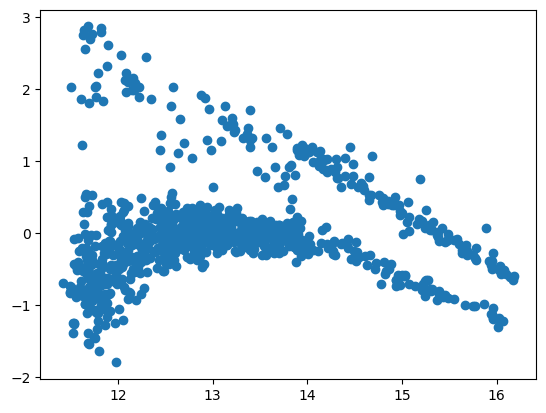

In [64]:
plt.scatter(y_predict_train,residuals)